# Razlikovanje jezika (srpski - engleski)

Pretopostavka je da se može razlikovati između srpskog i engleskog teksta na bazi učestalosti pojedinih bigrama u datom tekstu. Frekvencije pojedinih bigrama razlikuju se u ova dva jezika. Na primer, `th` je u engleskom jeziku znatno češće nego u srpskom.

## Rečnici frekvencija bigrama

Kreira se rečnik frekvencija bigrama u engleskom jeziku iz kratke priče A. C. Dojla `The Adventure of Wisteria Lodge`, a u srpskom iz dela pripovetke `Na Drini ćuprija` od Ive Andrića.

In [1]:
def recnik_bigrama(file):
    """Ucitava tekst iz fajla file i pravi recnik frekvencija"""
    
    interpunkcija = {".", ",", "?", "!", "\"", "-"}
    bigrami = {} 
    with open(file) as f:
        txt = f.read()
    
    # uklanja interpunkciju
    for znak in interpunkcija:
        txt = txt.replace(znak, "")
    
    # prolazi kroz sve reci...
    num_big = 0
    for rec in txt.split():
        n = len(rec)
        rec = rec.lower()
        if rec.isalpha() and n > 1:
            # ...i azurira frekvencije
            for i in range(n-1):
                bi = rec[i:i+2] 
                bigrami[bi] = bigrami.get(bi, 0) + 1
                num_big += 1
                
    # normalizacija uklanja efekte razlicitih duzina teksta 
    for big in bigrami:
        bigrami[big] /= num_big
        
    return bigrami

# test
recnik_bigrama("engleski.txt")

{'th': 0.03701648700063412,
 'he': 0.03123018389346861,
 'ad': 0.007530120481927711,
 'dv': 0.0007926442612555486,
 've': 0.011017755231452124,
 'en': 0.014267596702599873,
 'nt': 0.00800570703868104,
 'tu': 0.002060875079264426,
 'ur': 0.00832276474318326,
 're': 0.015298034242232087,
 'of': 0.009432466708941028,
 'wi': 0.006261889663918834,
 'is': 0.01585288522511097,
 'st': 0.009749524413443247,
 'te': 0.01030437539632213,
 'er': 0.019419784400760937,
 'ri': 0.005865567533291059,
 'ia': 0.00277425491439442,
 'lo': 0.004676601141407736,
 'od': 0.001981610653138871,
 'dg': 0.0012682308180088776,
 'ge': 0.004201014584654407,
 'ta': 0.003566899175649968,
 'ab': 0.0024571972098922003,
 'bl': 0.0024571972098922003,
 'le': 0.009749524413443247,
 'co': 0.007530120481927711,
 'on': 0.012761572606214331,
 'ts': 0.0031705770450221942,
 'si': 0.004438807863031071,
 'in': 0.02322447685478757,
 'ng': 0.010145846544071021,
 'gu': 0.0006341154090044388,
 'ul': 0.004121750158528852,
 'la': 0.0041217

### Najčešći bigrami u srpskom i engleskom

In [2]:
eng = recnik_bigrama("engleski.txt")
srp = recnik_bigrama("srpski.txt")

top_10_e = sorted(list(eng.items()), key=lambda x: x[1], reverse=True)[:10]
top_10_s = sorted(list(srp.items()), key=lambda x: x[1], reverse=True)[:10]

print("E:", top_10_e)
print("S:", top_10_s)

E: [('th', 0.03701648700063412), ('he', 0.03123018389346861), ('in', 0.02322447685478757), ('er', 0.019419784400760937), ('an', 0.01926125554850983), ('ou', 0.018864933417882056), ('ha', 0.017200380469245404), ('is', 0.01585288522511097), ('at', 0.01585288522511097), ('re', 0.015298034242232087)]
S: [('je', 0.02351683591662213), ('na', 0.02173525743809015), ('ra', 0.01790486370924639), ('ka', 0.016034206306787813), ('ne', 0.015677890611081418), ('st', 0.015588811687154818), ('ko', 0.01549973276322822), ('da', 0.013985391056476037), ('ni', 0.013361838588989846), ('ve', 0.013183680741136647)]


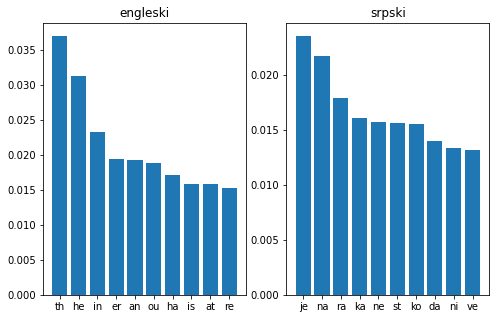

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# engleski
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
lab = list(map(lambda x: x[0], top_10_e))
freq = list(map(lambda x: x[1], top_10_e))
plt.bar(lab, freq)
plt.title("engleski")

# srpski
plt.subplot(1, 2, 2)
lab = list(map(lambda x: x[0], top_10_s))
freq = list(map(lambda x: x[1], top_10_s))
plt.bar(lab, freq)
plt.title("srpski")
            
plt.show()

## Klasifikator srpski - engleski

Algoritam klasifikatora koji se bazira na prebrojavanju najčešćih bigrama u tekstu i poređenju sa rečnicima bigrama po svakom od jezika:

1. prebroj $n$ najčešćih bigrama u tekstu čiji se jezik detektuje
2. svaki od $n$ bigrama poredi sa jezičkim profilima (rečnicima):
    - ako profil A ima veću vrednost za bigram $x$ od profila B, onda jezik A dobija jedan glas
    - ako su isti onda niko ne dobija glas
3. tekst se klasifikuje u jezik sa više glasova

In [4]:
def detektuj_jezik(recnik_srp, recnik_eng, file, n=30):
    """
    Detektuje da li je tekst iz fajla pisan srpskim 
    ili engleskim jezikom. Vraca broj glasova za srpski i engleski jezik. 
    """
    
    srpski, engleski = 0, 0
    jezik_x = recnik_bigrama(file)
    top_n = sorted(list(jezik_x.items()), key=lambda x: x[1], reverse=True)[:n]
    for big, _ in top_n:
        s_tezina, e_tezina = recnik_srp.get(big, 0), recnik_eng.get(big, 0)
        if s_tezina > e_tezina:
            srpski += 1
        elif e_tezina > s_tezina:
            engleski += 1
    
    return srpski, engleski

# test
s, e = detektuj_jezik(srp, eng, "proba1.txt")
print(f"srpski: {s} engleski: {e}")

s, e = detektuj_jezik(srp, eng, "proba2.txt")
print(f"srpski: {s} engleski: {e}")

srpski: 26 engleski: 4
srpski: 7 engleski: 23


### Zavisnost broja glasova od broja najčeščih bigrama u posmatranom tekstu 

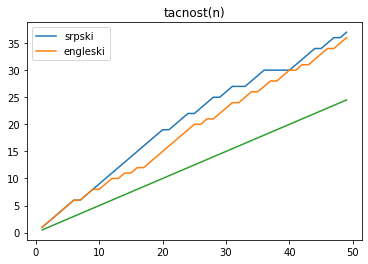

In [5]:
import numpy as np
glasovi_s, glasovi_e = [], []
for n in range(1, 50):
    s, e = detektuj_jezik(srp, eng, "proba1.txt", n)
    glasovi_s.append(s)
    
    s, e = detektuj_jezik(srp, eng, "proba2.txt", n)
    glasovi_e.append(e)
    
plt.plot(range(1, 50), glasovi_s, label="srpski")
plt.plot(range(1, 50), glasovi_e, label="engleski")
plt.plot(np.arange(1, 50), np.arange(1, 50)/2)
plt.title("tacnost(n)")
plt.legend()

plt.show()